In [117]:
import pandas as pd
Temu_df = pd.read_csv('C:/Users/buw-ki/PycharmProjects/Python_Datascientist/Temu_Reviews_15000_.csv' )

In [118]:
Temu_df.isna().sum()

UserId                    0
UserName                  3
ReviewCount               0
Relative Time             0
ReviewDate                0
ReviewRating              1
ReviewTitle               0
ReviewText              126
ReviewCountry             0
ReviewExperienceDate      1
ReplyText                 0
ReplyTime                24
dtype: int64

In [119]:
#1. Handling Missing UserNames (3 records)
Temu_df['UserName'] = Temu_df.apply(
    lambda x: f"Anonymous_{x['UserId']}" if pd.isna(x['UserName']) else x['UserName'],
    axis=1
)
Temu_df.isna().sum()

UserId                    0
UserName                  0
ReviewCount               0
Relative Time             0
ReviewDate                0
ReviewRating              1
ReviewTitle               0
ReviewText              126
ReviewCountry             0
ReviewExperienceDate      1
ReplyText                 0
ReplyTime                24
dtype: int64

In [120]:
#2. Handling Missing ReviewRating (1 records)
#Drop the row with missing ReviewRating
Temu_df = Temu_df.dropna(subset=['ReviewRating'])
Temu_df.isna().sum()

UserId                    0
UserName                  0
ReviewCount               0
Relative Time             0
ReviewDate                0
ReviewRating              0
ReviewTitle               0
ReviewText              126
ReviewCountry             0
ReviewExperienceDate      0
ReplyText                 0
ReplyTime                23
dtype: int64

In [121]:
#3. Handling Missing ReviewText (126 records)
print(f"Percentage of missing ReviewText: {Temu_df['ReviewText'].isna().mean()*100:.2f}%")
# Display rows with ReviewTitle but empty ReviewText
empty_review_rows = Temu_df[Temu_df['ReviewText'].isna() & Temu_df['ReviewTitle'].notna()]
columns_to_display = ['UserId', 'UserName', 'ReviewTitle', 'ReviewText', 'ReviewRating', 'ReviewDate']
print(empty_review_rows[columns_to_display].head(10))

Percentage of missing ReviewText: 0.93%
                        UserId                  UserName  \
79    67f4fc42eb721a38ebd68600               Kishan Hall   
325   6710218af6bf385b622cd1e3                    Daniel   
386   5e8da767625145accded337f             Felician Bica   
405   6840b7594e662d192132415d  HARINARAYANAN SUNILKUMAR   
558   615b33c05a55960012babdd1                     Baker   
605   68331be1f0e9f36e1254dac0                 Tess Rose   
1079  680cd9ffb83f2cd5c464b17a                   quinbee   
1141  6808d5bb9db70e5f4f9daff4               Leota Study   
1260  67fe8fc783edc0bc8160aa26           Susan Valentine   
1336  63b3f29c880d200012bf7b1b            Mohammed Azyan   

                                  ReviewTitle ReviewText  ReviewRating  \
79                             Impressed ♥️🙌🙌        NaN           5.0   
325       No parcel received and no refund!!!        NaN           1.0   
386                              Zero support        NaN           1.0   
405

In [122]:
#Drop the row with missing ReviewText
Temu_df = Temu_df.dropna(subset=['ReviewText'])
Temu_df.isna().sum()

UserId                   0
UserName                 0
ReviewCount              0
Relative Time            0
ReviewDate               0
ReviewRating             0
ReviewTitle              0
ReviewText               0
ReviewCountry            0
ReviewExperienceDate     0
ReplyText                0
ReplyTime               23
dtype: int64

In [123]:
#3. Handling Missing ReplyTime (23  records)
print(f"Percentage of missing ReplyTime: {Temu_df['ReplyTime'].isna().mean()*100:.2f}%")
Temu_df = Temu_df.dropna(subset=['ReplyTime'])
Temu_df.isna().sum()

Percentage of missing ReplyTime: 0.17%


UserId                  0
UserName                0
ReviewCount             0
Relative Time           0
ReviewDate              0
ReviewRating            0
ReviewTitle             0
ReviewText              0
ReviewCountry           0
ReviewExperienceDate    0
ReplyText               0
ReplyTime               0
dtype: int64

In [124]:
Temu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13450 entries, 23 to 13599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserId                13450 non-null  object 
 1   UserName              13450 non-null  object 
 2   ReviewCount           13450 non-null  int64  
 3   Relative Time         13450 non-null  object 
 4   ReviewDate            13450 non-null  object 
 5   ReviewRating          13450 non-null  float64
 6   ReviewTitle           13450 non-null  object 
 7   ReviewText            13450 non-null  object 
 8   ReviewCountry         13450 non-null  object 
 9   ReviewExperienceDate  13450 non-null  object 
 10  ReplyText             13450 non-null  object 
 11  ReplyTime             13450 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ MB


In [125]:
# Data Preparation & Cleaning
import pandas as pd
from textblob import TextBlob

# Convert datetime columns properly
#Temu_df['ReviewDate'] = pd.to_datetime(Temu_df['ReviewDate'])
#Temu_df['ReviewExperienceDate'] = pd.to_datetime(Temu_df['ReviewExperienceDate'])
#Temu_df['ReplyTime'] = pd.to_datetime(Temu_df['ReplyTime'])
# 1. Data Loading with Robust DateTime Parsing

    
# Handle datetime columns with potential microseconds
datetime_cols = ['ReviewDate', 'ReviewExperienceDate', 'ReplyTime']
for col in datetime_cols:
    try:
        # First try with microseconds format
        Temu_df[col] = pd.to_datetime(Temu_df[col], format='%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        try:
            # Fallback to standard format if microseconds aren't present
            Temu_df[col] = pd.to_datetime(Temu_df[col], format='%Y-%m-%d %H:%M:%S')
        except ValueError:
            # Final fallback to pandas' automatic parsing
            Temu_df[col] = pd.to_datetime(Temu_df[col], errors='coerce')
    
print(f"Percentage of missing ReplyTime: {Temu_df['ReplyTime'].isna().mean()*100:.2f}%")
Temu_df = Temu_df.dropna(subset=['ReplyTime'])
#Temu_df.head()

Percentage of missing ReplyTime: 1.12%


In [126]:
Temu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13299 entries, 23 to 13599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   UserId                13299 non-null  object             
 1   UserName              13299 non-null  object             
 2   ReviewCount           13299 non-null  int64              
 3   Relative Time         13299 non-null  object             
 4   ReviewDate            13299 non-null  datetime64[ns, UTC]
 5   ReviewRating          13299 non-null  float64            
 6   ReviewTitle           13299 non-null  object             
 7   ReviewText            13299 non-null  object             
 8   ReviewCountry         13299 non-null  object             
 9   ReviewExperienceDate  13299 non-null  datetime64[ns]     
 10  ReplyText             13299 non-null  object             
 11  ReplyTime             13299 non-null  datetime64[ns]     
dtypes: datet

In [127]:
Temu_df.describe()

,ReviewCount,ReviewRating,ReviewExperienceDate,ReplyTime
count,13299.000000,13299.000000,13299,13299
mean,10.364238,2.542296,2024-04-11 11:03:57.942702592,2024-04-23 00:35:16.909391872
min,1.000000,1.000000,2022-06-24 00:00:00,2022-11-14 17:07:26
25%,1.000000,1.000000,2023-09-01 00:00:00,2023-09-15 11:33:57
50%,4.000000,1.000000,2024-04-23 00:00:00,2024-05-06 06:20:51
75%,11.000000,5.000000,2024-11-06 00:00:00,2024-11-17 09:24:31.500000
max,329.000000,5.000000,2025-06-24 00:00:00,2025-06-24 12:46:03
std,18.234881,1.779569,NaN,NaN


ReviewRating (Target Variable)

    Mean = 2.54 (scale likely 1-5)

    50% of reviews are 1-star (median), but 75th percentile jumps to 5-star → Highly skewed distribution

    Suggests either:

        Binary classification may work better (e.g., 1-2-3 = Negative, 4-5 = Positive)

        Or handle skewness via SMOTE/class weights

ReviewCount (User Activity)

    Mean = 10.4 but median = 4 → Most users leave few reviews

    Max = 329 → Some "power users" exist

    Feature Idea:

        LogReviewCount = np.log1p(df['ReviewCount']) to reduce skew

        Bucket into categories (e.g., 1, 2-5, 6-20, 20+)

Temporal Columns

    ReviewExperienceDate (when service was used) vs. ReplyTime (company response time):

        Median experience date is 2024-04-23, but median reply is 2024-05-06 → ~13-day response delay

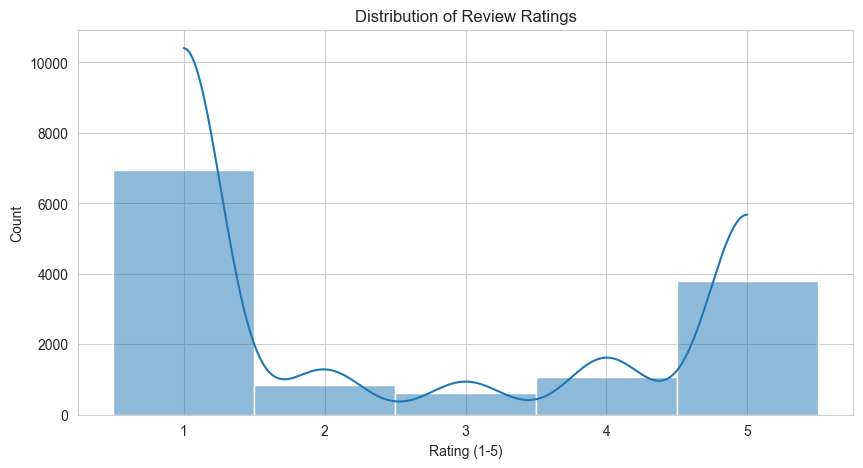

In [128]:
#1. ReviewRating Distribution
# Histogram + Kernel Density Estimate (KDE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(Temu_df['ReviewRating'], bins=5, kde=True, discrete=True)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

Ratings are bimodal (peaks at 1 and 5), we consider binary classification.

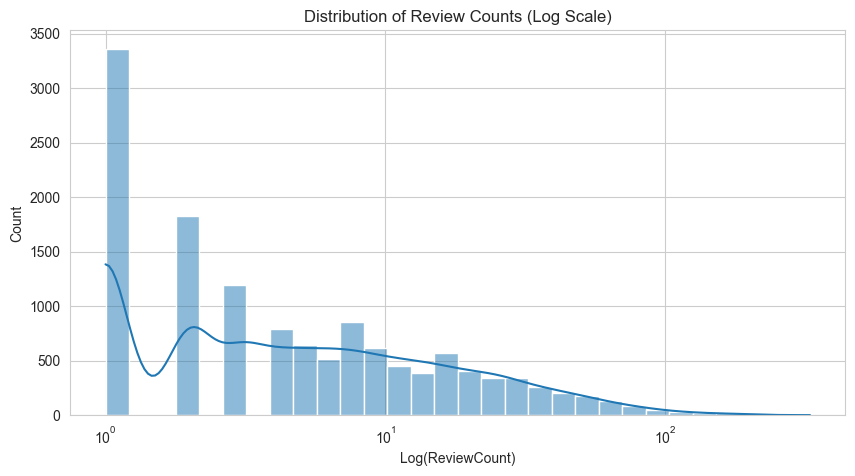

In [129]:
# 2. ReviewCount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(Temu_df['ReviewCount'], bins=30, kde=True, log_scale=True)
plt.title('Distribution of Review Counts (Log Scale)')
plt.xlabel('Log(ReviewCount)')
plt.ylabel('Count')
plt.show()

Most users have low ReviewCount (left-skewed), but a few are hyperactive (right tail).

Log scale helps visualize the long tail.

C:\Users\buw-ki\AppData\Local\Temp\ipykernel_6812\1455711609.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='ReviewRating', y='ReviewCount', data=Temu_df, inner='quartile', scale='count')


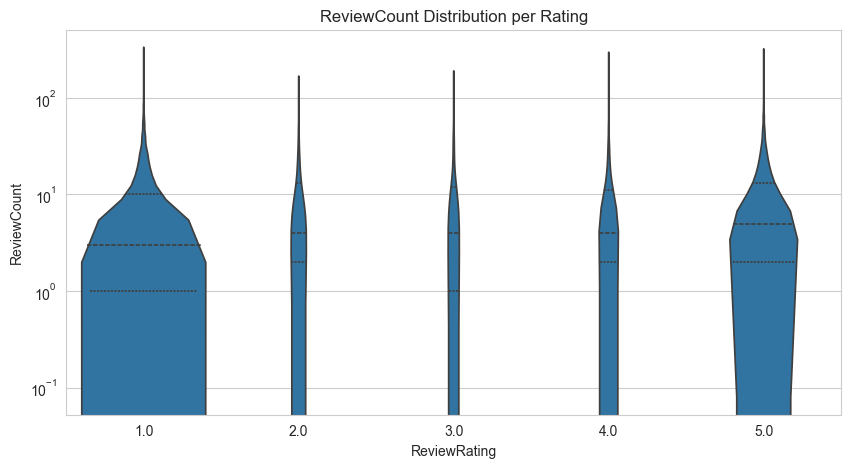

In [130]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='ReviewRating', y='ReviewCount', data=Temu_df, inner='quartile', scale='count')
plt.title('ReviewCount Distribution per Rating')
plt.yscale('log')  # Log-transform y-axis
plt.show()

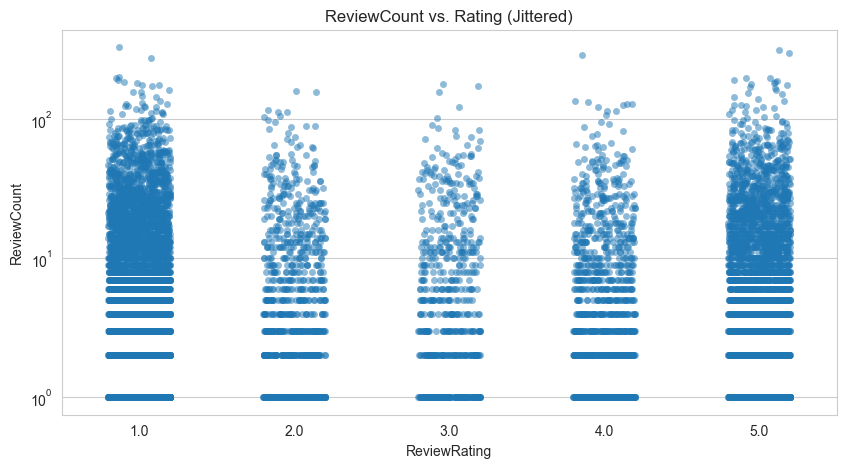

In [131]:
# 3. Combined Plot (Rating vs. ReviewCount)
plt.figure(figsize=(10, 5))
sns.stripplot(x='ReviewRating', y='ReviewCount', data=Temu_df, jitter=0.2, alpha=0.5)
plt.title('ReviewCount vs. Rating (Jittered)')
plt.yscale('log')
plt.show()

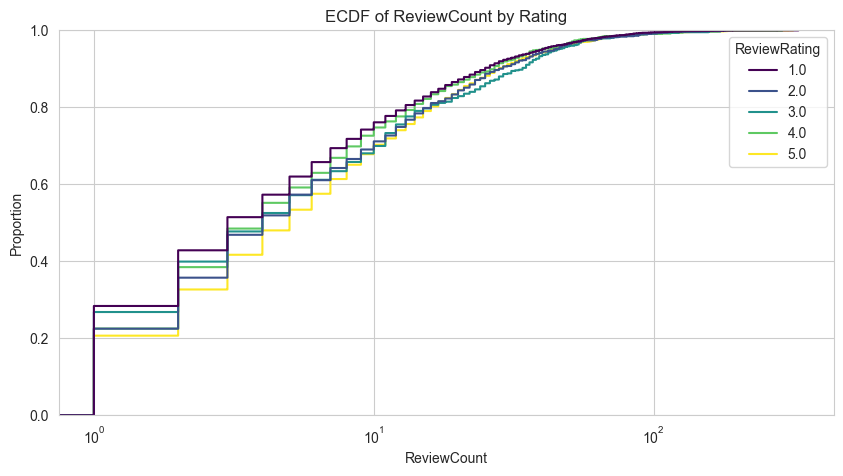

In [132]:
# 4. Advanced: Empirical Cumulative Distribution (ECDF)
plt.figure(figsize=(10, 5))
sns.ecdfplot(data=Temu_df, x='ReviewCount', hue='ReviewRating', palette='viridis')
plt.xscale('log')
plt.title('ECDF of ReviewCount by Rating')
plt.show()

C:\Users\buw-ki\AppData\Local\Temp\ipykernel_6812\3095031087.py:19: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='ReviewRating', y='ReviewCount', data=Temu_df, inner='quartile', scale='count', ax=axes[1, 0])


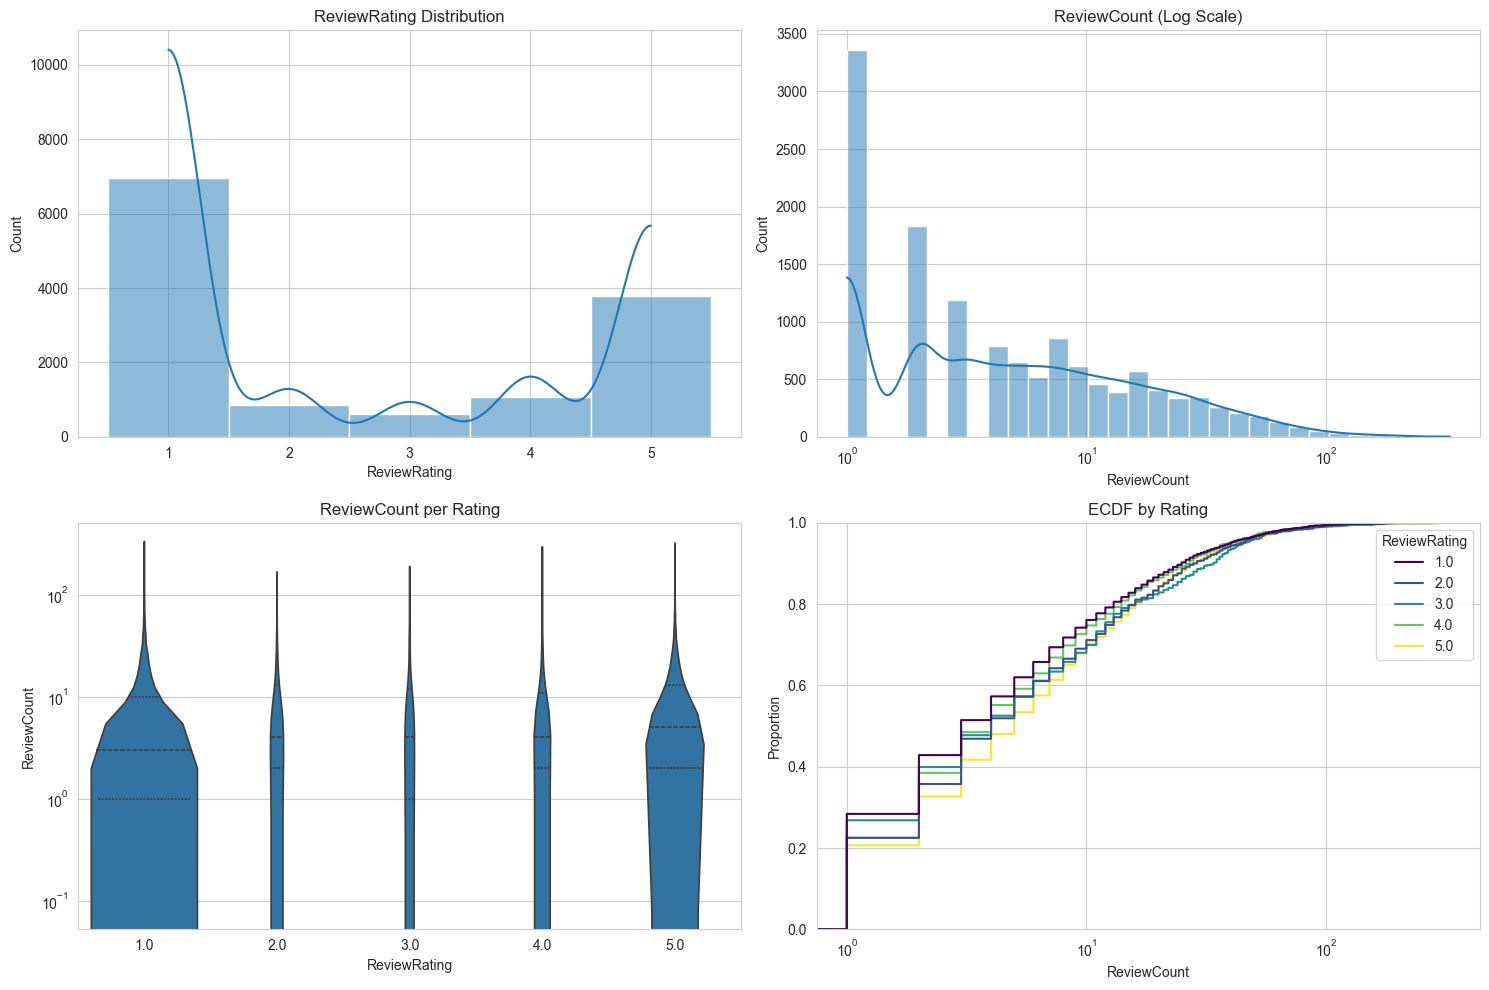

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Rating Distribution
sns.histplot(Temu_df['ReviewRating'], bins=5, kde=True, discrete=True, ax=axes[0, 0])
axes[0, 0].set_title('ReviewRating Distribution')

# Plot 2: ReviewCount (Log Scale)
sns.histplot(Temu_df['ReviewCount'], bins=30, kde=True, log_scale=True, ax=axes[0, 1])
axes[0, 1].set_title('ReviewCount (Log Scale)')

# Plot 3: Violin Plot
sns.violinplot(x='ReviewRating', y='ReviewCount', data=Temu_df, inner='quartile', scale='count', ax=axes[1, 0])
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('ReviewCount per Rating')

# Plot 4: ECDF
sns.ecdfplot(data=Temu_df, x='ReviewCount', hue='ReviewRating', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_xscale('log')
axes[1, 1].set_title('ECDF by Rating')

plt.tight_layout()
plt.show()

In [134]:
# Calculate UserAvgRating (average rating per user)
user_stats = Temu_df.groupby('UserId')['ReviewRating'].agg(['mean', 'count']).reset_index()
user_stats.columns = ['UserId', 'UserAvgRating', 'UserTotalReviews']
print(user_stats)

# Merge back into the original dataframe
Temu_df = Temu_df.merge(user_stats, on='UserId', how='left')

# Optional: Flag power users (e.g., top 10% by review count)
#df['IsPowerUser'] = (df['UserTotalReviews'] > df['UserTotalReviews'].quantile(0.9)).astype(int)

                         UserId  UserAvgRating  UserTotalReviews
0      47f0d12400006400010018c7            1.0                 1
1      49a51d42000064000100db47            1.0                 1
2      4a673fd70000640001015041            1.0                 1
3      4a71808e000064000101561b            1.0                 1
4      4b24f5a8000064000101de1d            2.0                 1
...                         ...            ...               ...
13293  685966472f2478ff0728ccea            1.0                 1
13294  6859ef108a5375ce4878dae2            5.0                 1
13295  685a019b8a5375d77378e3bf            1.0                 1
13296  685a15682824b5bcfc1e0bc3            1.0                 1
13297  685a37ac8a5375a5f678f94c            1.0                 1

[13298 rows x 3 columns]


In [135]:
# 2. Temporal Features
# Convert dates and relative time into meaningful numerical features.
Temu_df['ReviewDayOfWeek'] = Temu_df['ReviewDate'].dt.dayofweek  # Monday=0, Sunday=6
Temu_df['ReviewMonth'] = Temu_df['ReviewDate'].dt.month
Temu_df['ReviewYear'] = Temu_df['ReviewDate'].dt.year
Temu_df['IsWeekend'] = (Temu_df['ReviewDayOfWeek'] >= 5).astype(int)  # 1 if Saturday/Sunday
# Convert "Relative Time" (e.g., "2 days ago") to numerical
import re
def extract_days(text):
    match = re.search(r'(\d+)\s+(day|week|month|year)', text)
    if not match:
        return 0
    num, unit = match.groups()
    multiplier = {
        'day': 1,
        'week': 7,
        'month': 30,
        'year': 365
    }.get(unit, 1)
    return float(num) * multiplier

Temu_df['DaysSinceReview'] = Temu_df['Relative Time'].apply(extract_days)
# Calculate ResponseDelay (time between review and reply, in days)
# Convert both to a specific timezone (e.g., 'US/Eastern')
Temu_df['ReviewDate'] = Temu_df['ReviewDate'].dt.tz_convert('US/Eastern')
Temu_df['ReplyTime'] = Temu_df['ReplyTime'].dt.tz_localize('US/Eastern')
Temu_df['ResponseDelay'] = (Temu_df['ReplyTime'] - Temu_df['ReviewDate']).dt.total_seconds() / (24 * 3600)
Temu_df['ResponseDelay'].fillna(-1, inplace=True)  # -1 indicates no reply

C:\Users\buw-ki\AppData\Local\Temp\ipykernel_6812\2434985689.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Temu_df['ResponseDelay'].fillna(-1, inplace=True)  # -1 indicates no reply


In [136]:
Temu_df.head(5)
Temu_df.isna().sum()

UserId                  0
UserName                0
ReviewCount             0
Relative Time           0
ReviewDate              0
ReviewRating            0
ReviewTitle             0
ReviewText              0
ReviewCountry           0
ReviewExperienceDate    0
ReplyText               0
ReplyTime               0
UserAvgRating           0
UserTotalReviews        0
ReviewDayOfWeek         0
ReviewMonth             0
ReviewYear              0
IsWeekend               0
DaysSinceReview         0
ResponseDelay           0
dtype: int64

In [137]:
# 3. Text Sentiment Features
# Use NLP to quantify review sentiment and structure.

from textblob import TextBlob

# Function to calculate sentiment polarity (-1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to ReviewText and ReviewTitle
Temu_df['ReviewTextSentiment'] = Temu_df['ReviewText'].apply(get_sentiment)
Temu_df['ReviewTitleSentiment'] = Temu_df['ReviewTitle'].apply(get_sentiment)

# Text length features
Temu_df['ReviewTextLength'] = Temu_df['ReviewText'].str.len()
Temu_df['ReviewWordCount'] = Temu_df['ReviewText'].str.split().str.len()
Temu_df['HasExclamation'] = Temu_df['ReviewText'].str.contains('!').astype(int)

In [138]:
Temu_df.head(5)

,UserId,UserName,ReviewCount,Relative Time,ReviewDate,ReviewRating,ReviewTitle,ReviewText,ReviewCountry,ReviewExperienceDate,...,ReviewMonth,ReviewYear,IsWeekend,DaysSinceReview,ResponseDelay,ReviewTextSentiment,ReviewTitleSentiment,ReviewTextLength,ReviewWordCount,HasExclamation
0,55c8733b0000ff0001d2fe87,linda rouse,43,16 hours ago,2025-06-24 05:18:07-04:00,4.0,On the whole Temu items are good,On the whole Temu items are good. I have had o...,GB,2025-06-21,...,6,2025,0,0.0,0.265475,0.246875,0.45,308,58,0
1,5dadf507a9f791c838ffc58f,Emma Carson,21,17 hours ago,2025-06-24 04:57:41-04:00,1.0,Disgraceful company,I have spent a lot of money on there site but ...,GB,2025-06-24,...,6,2025,0,0.0,0.305625,-0.085714,0.00,347,71,0
2,6853e0b72824b5c08917fed7,xINSANE,1,17 hours ago,2025-06-24 04:49:00-04:00,2.0,Dear temu after requesting for a refund…,Dear temu after requesting for a refund their ...,PK,2025-06-19,...,6,2025,0,0.0,0.311829,0.000000,0.00,341,65,0
3,5ac2868d4de5666d34c7f6f9,Martin wall,11,17 hours ago,2025-06-24 04:27:34-04:00,1.0,Crap Tap,Ordered a kitchen tap which looked great in th...,GB,2025-06-21,...,6,2025,0,0.0,0.326852,0.600000,-0.80,113,20,0
4,685a37ac8a5375a5f678f94c,Keti,1,18 hours ago,2025-06-24 03:29:51-04:00,1.0,"""Your system removed the promised…","I returned an item worth 23.95 GEL, and the mo...",GE,2025-06-24,...,6,2025,0,0.0,0.385729,0.350000,0.00,489,89,0


In [139]:
#4. Geolocation Features
# Encode countries or regions.

# One-hot encode top countries (reduce dimensionality)
top_countries = Temu_df['ReviewCountry'].value_counts().nlargest(10).index
for country in top_countries:
    Temu_df[f'Country_{country}'] = (Temu_df['ReviewCountry'] == country).astype(int)


In [140]:
Temu_df.head(5)

,UserId,UserName,ReviewCount,Relative Time,ReviewDate,ReviewRating,ReviewTitle,ReviewText,ReviewCountry,ReviewExperienceDate,...,Country_GB,Country_US,Country_CA,Country_AU,Country_IE,Country_NZ,Country_ZA,Country_NL,Country_AE,Country_DK
0,55c8733b0000ff0001d2fe87,linda rouse,43,16 hours ago,2025-06-24 05:18:07-04:00,4.0,On the whole Temu items are good,On the whole Temu items are good. I have had o...,GB,2025-06-21,...,1,0,0,0,0,0,0,0,0,0
1,5dadf507a9f791c838ffc58f,Emma Carson,21,17 hours ago,2025-06-24 04:57:41-04:00,1.0,Disgraceful company,I have spent a lot of money on there site but ...,GB,2025-06-24,...,1,0,0,0,0,0,0,0,0,0
2,6853e0b72824b5c08917fed7,xINSANE,1,17 hours ago,2025-06-24 04:49:00-04:00,2.0,Dear temu after requesting for a refund…,Dear temu after requesting for a refund their ...,PK,2025-06-19,...,0,0,0,0,0,0,0,0,0,0
3,5ac2868d4de5666d34c7f6f9,Martin wall,11,17 hours ago,2025-06-24 04:27:34-04:00,1.0,Crap Tap,Ordered a kitchen tap which looked great in th...,GB,2025-06-21,...,1,0,0,0,0,0,0,0,0,0
4,685a37ac8a5375a5f678f94c,Keti,1,18 hours ago,2025-06-24 03:29:51-04:00,1.0,"""Your system removed the promised…","I returned an item worth 23.95 GEL, and the mo...",GE,2025-06-24,...,0,0,0,0,0,0,0,0,0,0


In [141]:
top_countries

Index(['GB', 'US', 'CA', 'AU', 'IE', 'NZ', 'ZA', 'NL', 'AE', 'DK'], dtype='object', name='ReviewCountry')

In [143]:
# 5. Experience Recency
# Calculate how long the user waited to review after their experience.
Temu_df['ReviewExperienceDate'] = Temu_df['ReviewExperienceDate'].dt.tz_localize('US/Eastern')
Temu_df['ExperienceToReviewDays'] = (
    (Temu_df['ReviewDate'] - Temu_df['ReviewExperienceDate']).dt.total_seconds() / (24 * 3600)
)

In [144]:
Temu_df.isna().sum()

UserId                    0
UserName                  0
ReviewCount               0
Relative Time             0
ReviewDate                0
ReviewRating              0
ReviewTitle               0
ReviewText                0
ReviewCountry             0
ReviewExperienceDate      0
ReplyText                 0
ReplyTime                 0
UserAvgRating             0
UserTotalReviews          0
ReviewDayOfWeek           0
ReviewMonth               0
ReviewYear                0
IsWeekend                 0
DaysSinceReview           0
ResponseDelay             0
ReviewTextSentiment       0
ReviewTitleSentiment      0
ReviewTextLength          0
ReviewWordCount           0
HasExclamation            0
Country_GB                0
Country_US                0
Country_CA                0
Country_AU                0
Country_IE                0
Country_NZ                0
Country_ZA                0
Country_NL                0
Country_AE                0
Country_DK                0
ExperienceToReviewDa

In [146]:
# 7. Drop Redundant Columns
# Remove original columns that are now redundant (keep engineered features):
Temu_df.drop([
    'Relative Time',  # Replaced by DaysSinceReview
    'UserName',      # Not useful (use UserId if needed)
    'ReplyText',     # Already processed for sentiment
], axis=1, inplace=True)

In [153]:
# 1.1 Create Review Recency Bins
bins = [0, 1, 7, 30, 90, 365, np.inf]
labels = ['1d', '1w', '1m', '3m', '1y', '1y+']
Temu_df['Recency'] = pd.cut(Temu_df['DaysSinceReview'], 
                          bins=bins,
                          labels=labels,
                          right=False,  
                          include_lowest=True)
# 3. Verify no NaNs exist in Recency
print("NaN count in Recency:", Temu_df['Recency'].isna().sum())
# 1.2 User Engagement Features
Temu_df['ReviewFreq'] = Temu_df['UserTotalReviews'] / (Temu_df['DaysSinceReview'] + 1)  # Avoid division by zero
Temu_df['RatingDeviation'] = abs(Temu_df['ReviewRating'] - Temu_df['UserAvgRating'])

# 1.3 Temporal Features
Temu_df['ExperienceYearMonth'] = Temu_df['ReviewExperienceDate'].dt.to_period('M')
Temu_df['ReviewHour'] = Temu_df['ReviewDate'].dt.hour
Temu_df['IsBusinessHours'] = ((Temu_df['ReviewHour'] >= 9) & (Temu_df['ReviewHour'] <= 17)).astype(int)

NaN count in Recency: 0


C:\Users\buw-ki\AppData\Local\Temp\ipykernel_6812\2976699269.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  Temu_df['ExperienceYearMonth'] = Temu_df['ReviewExperienceDate'].dt.to_period('M')


In [154]:
Temu_df.head(5)

,UserId,ReviewCount,ReviewDate,ReviewRating,ReviewTitle,ReviewText,ReviewCountry,ReviewExperienceDate,ReplyTime,UserAvgRating,...,Country_NL,Country_AE,Country_DK,ExperienceToReviewDays,Recency,ReviewFreq,RatingDeviation,ExperienceYearMonth,ReviewHour,IsBusinessHours
0,55c8733b0000ff0001d2fe87,43,2025-06-24 05:18:07-04:00,4.0,On the whole Temu items are good,On the whole Temu items are good. I have had o...,GB,2025-06-21 00:00:00-04:00,2025-06-24 11:40:24-04:00,4.0,...,0,0,0,3.220914,1d,1.0,0.0,2025-06,5,0
1,5dadf507a9f791c838ffc58f,21,2025-06-24 04:57:41-04:00,1.0,Disgraceful company,I have spent a lot of money on there site but ...,GB,2025-06-24 00:00:00-04:00,2025-06-24 12:17:47-04:00,1.0,...,0,0,0,0.206725,1d,1.0,0.0,2025-06,4,0
2,6853e0b72824b5c08917fed7,1,2025-06-24 04:49:00-04:00,2.0,Dear temu after requesting for a refund…,Dear temu after requesting for a refund their ...,PK,2025-06-19 00:00:00-04:00,2025-06-24 12:18:02-04:00,2.0,...,0,0,0,5.200694,1d,1.0,0.0,2025-06,4,0
3,5ac2868d4de5666d34c7f6f9,11,2025-06-24 04:27:34-04:00,1.0,Crap Tap,Ordered a kitchen tap which looked great in th...,GB,2025-06-21 00:00:00-04:00,2025-06-24 12:18:14-04:00,1.0,...,0,0,0,3.185810,1d,1.0,0.0,2025-06,4,0
4,685a37ac8a5375a5f678f94c,1,2025-06-24 03:29:51-04:00,1.0,"""Your system removed the promised…","I returned an item worth 23.95 GEL, and the mo...",GE,2025-06-24 00:00:00-04:00,2025-06-24 12:45:18-04:00,1.0,...,0,0,0,0.145729,1d,1.0,0.0,2025-06,3,0


In [155]:
# Categorical Encoding
from sklearn.preprocessing import OrdinalEncoder

# 2.1 Ordinal encode hierarchical categories
time_hierarchy = ['1d', '1w', '1m', '3m', '1y', '1y+']
Temu_df['Recency_encoded'] = OrdinalEncoder(categories=[time_hierarchy]).fit_transform(Temu_df[['Recency']])



In [156]:
#3. Text Feature Augmentation
# 3.1 Sentiment intensity
Temu_df['ReviewText_Subjectivity'] = Temu_df['ReviewText'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
Temu_df['TitleText_ratio'] = Temu_df['ReviewTitle'].str.len() / (Temu_df['ReviewText'].str.len() + 0.001)  # Avoid division by zero

# 3.2 Emotional tone indicators
Temu_df['HasQuestion'] = Temu_df['ReviewText'].str.contains('\?').astype(int)
Temu_df['AllCapsRatio'] = Temu_df['ReviewText'].str.findall(r'[A-Z]{2,}').str.len() / Temu_df['ReviewWordCount']

<>:7: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\?'
C:\Users\buw-ki\AppData\Local\Temp\ipykernel_6812\4197454492.py:7: SyntaxWarning: invalid escape sequence '\?'
  Temu_df['HasQuestion'] = Temu_df['ReviewText'].str.contains('\?').astype(int)


In [157]:
# 4.1 Seasonality
Temu_df['ExperienceSeason'] = Temu_df['ReviewExperienceDate'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# 4.2 Holiday proximity (example for US holidays)
holidays = ['12-25', '07-04', '11-11']  # Christmas, Independence Day, Veterans Day
Temu_df['IsHoliday'] = Temu_df['ReviewExperienceDate'].dt.strftime('%m-%d').isin(holidays).astype(int)

In [159]:
#5. Final Feature Selection

# Keep these engineered features + original non-redundant features
final_features = [
    # User meta
    'UserAvgRating', 'UserTotalReviews', 'ReviewFreq', 'RatingDeviation',
    
    # Temporal
    'Recency_encoded', 'IsBusinessHours', 'ExperienceYearMonth', 'IsHoliday',
    
    # Text
    'ReviewTextSentiment', 'ReviewText_Subjectivity', 'TitleText_ratio', 'HasQuestion',
    
    # Country flags
    *[f'Country_{c}' for c in top_countries],
    
    # Target
    'ReviewRating'
]

df_final = Temu_df[final_features]

C:\Users\buw-ki\AppData\Local\Temp\ipykernel_6812\750314550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ExperienceYearMonth_num'] = df_final['ExperienceYearMonth'].dt.to_timestamp().astype('int64') // 10**9


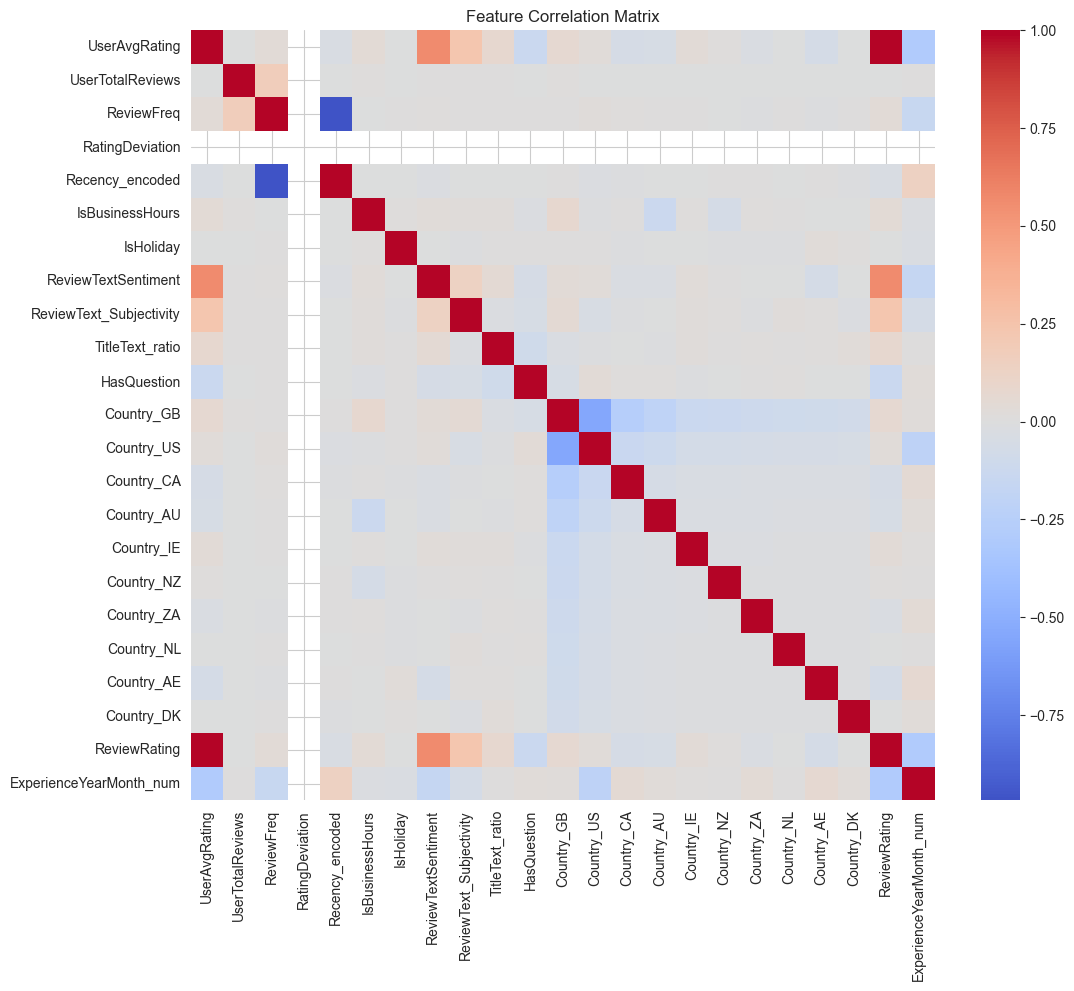

In [161]:
# 6. Feature Correlation Check (Sanity Test)

import seaborn as sns
import matplotlib.pyplot as plt

# Convert Period to integer (e.g., 202312 for Dec 2023)
df_final['ExperienceYearMonth_num'] = df_final['ExperienceYearMonth'].dt.to_timestamp().astype('int64') // 10**9

# Drop the original Period column
df_final = df_final.drop('ExperienceYearMonth', axis=1)

# Now generate correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_final.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

In [162]:
# Check rating distribution
rating_dist = df_final['ReviewRating'].value_counts(normalize=True)
print(rating_dist)

# Decision point (based on your earlier bimodal distribution)
if rating_dist.loc[1] + rating_dist.loc[5] > 0.7:  # If most ratings are 1 or 5
    problem_type = 'classification'
    df_final['Target'] = (df_final['ReviewRating'] >= 4).astype(int)  # 1=Positive (4-5), 0=Negative (1-3)
else:
    problem_type = 'regression'
    df_final['Target'] = df_final['ReviewRating']

ReviewRating
1.0    0.522520
5.0    0.285209
4.0    0.081059
2.0    0.064140
3.0    0.047071
Name: proportion, dtype: float64
